# y=wx+b

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Step 1: Create a synthetic dataset
np.random.seed(42)
X = np.random.rand(10, 1) * 10  # 100 random points between 0 and 10
y = 2 * X + 3 + np.random.randn(10, 1)  # Linear relationship with noise

# Convert to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)
#print(X_tensor[9])

# Step 2: Train a linear regression model using sklearn
model = LinearRegression()
model.fit(X, y)

# Step 3: Get predictions from the model
y_pred = model.predict(X)

# Step 4: Plotting the data and the regression line
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, y_pred, color='red', label='Fitted line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Linear Regression using Scikit-Learn')
plt.show()

# Getting the learned parameters
intercept = model.intercept_
coefficient = model.coef_

print(f"Intercept (β₀): {intercept}")
print(f"Coefficient (β₁): {coefficient}")


In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Create a synthetic dataset
np.random.seed(42)
X = np.random.rand(10, 1) * 10  # 10 random points between 0 and 10
y = 2 * X + 3 + np.random.randn(10, 1)  # Linear relationship with noise

# Convert to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

# Step 2: Define the Neural Network Model (single layer)
class LinearRegressionNN(nn.Module):
    def __init__(self):
        super(LinearRegressionNN, self).__init__()
        self.linear = nn.Linear(1, 1)  # Single input and single output

    def forward(self, x):
        return self.linear(x)

# Initialize the model
model = LinearRegressionNN()

# Step 3: Loss function and optimizer
criterion = nn.MSELoss()  # Mean Squared Error loss
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)  # Stochastic Gradient Descent

# Step 4: Train the model
epochs = 1000
for epoch in range(epochs):
    # Forward pass
    y_pred = model(X_tensor)
    
    # Compute the loss
    loss = criterion(y_pred, y_tensor)
    
    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    
    # Update the weights
    optimizer.step()

    # Print loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Step 5: Get predictions
with torch.no_grad():
    y_pred_nn = model(X_tensor).numpy()

# Step 6: Plotting the data and the regression line
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, y_pred_nn, color='red', label='Fitted line (NN)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Linear Regression using Neural Network (PyTorch)')
plt.show()

# Getting the learned parameters
intercept_nn = model.linear.bias.item()
coefficient_nn = model.linear.weight.item()

print(f"Intercept (β₀) from Neural Network: {intercept_nn}")
print(f"Coefficient (β₁) from Neural Network: {coefficient_nn}")


# y = a*x1 + b*x2 + c

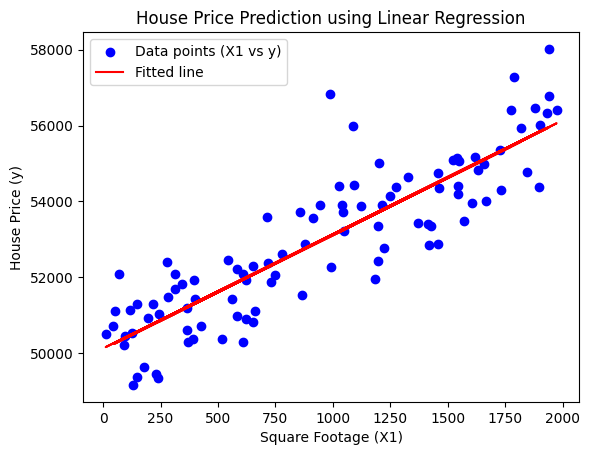

Intercept (c): [50089.69662445]
Coefficients (a, b): [[3.01004631 9.74958816]]


In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Step 1: Create a synthetic dataset for house price prediction
np.random.seed(42)

# Features (e.g., square footage and number of bedrooms)
X1 = np.random.rand(100, 1) * 2000  # Square footage (0-2000 sqft)
X2 = np.random.randint(1, 5, (100, 1))  # Number of bedrooms (1 to 4)

# Target (House price), linear relation with some noise
y = 3 * X1 + 3 * X2 + 50000 + np.random.randn(100, 1) * 1000 # y = a*x1 + b*x2 + c

# Combine the features into a single matrix
X = np.hstack((X1, X2))

# Step 2: Train a linear regression model using sklearn
model = LinearRegression()
model.fit(X, y)

# Step 3: Get predictions from the model
y_pred = model.predict(X)

# Step 4: Visualizing the results (using only 2D for simplicity)
plt.scatter(X1, y, color='blue', label='Data points (X1 vs y)')
plt.plot(X1, y_pred, color='red', label='Fitted line')
plt.xlabel('Square Footage (X1)')
plt.ylabel('House Price (y)')
plt.legend()
plt.title('House Price Prediction using Linear Regression')
plt.show()

# Step 5: Print model parameters
print(f"Intercept (c): {model.intercept_}")
print(f"Coefficients (a, b): {model.coef_}")


Epoch [100/2000], Loss: 49595688.0000
Epoch [200/2000], Loss: 30571120.0000
Epoch [300/2000], Loss: 22059686.0000
Epoch [400/2000], Loss: 16239644.0000
Epoch [500/2000], Loss: 12172980.0000
Epoch [600/2000], Loss: 9279326.0000
Epoch [700/2000], Loss: 7187261.5000
Epoch [800/2000], Loss: 5654136.5000
Epoch [900/2000], Loss: 4517979.5000
Epoch [1000/2000], Loss: 3668345.5000
Epoch [1100/2000], Loss: 3028432.0000
Epoch [1200/2000], Loss: 2543752.2500
Epoch [1300/2000], Loss: 2175051.7500
Epoch [1400/2000], Loss: 1893647.2500
Epoch [1500/2000], Loss: 1678311.5000
Epoch [1600/2000], Loss: 1513231.0000
Epoch [1700/2000], Loss: 1386493.7500
Epoch [1800/2000], Loss: 1289082.7500
Epoch [1900/2000], Loss: 1214150.1250
Epoch [2000/2000], Loss: 1156475.0000


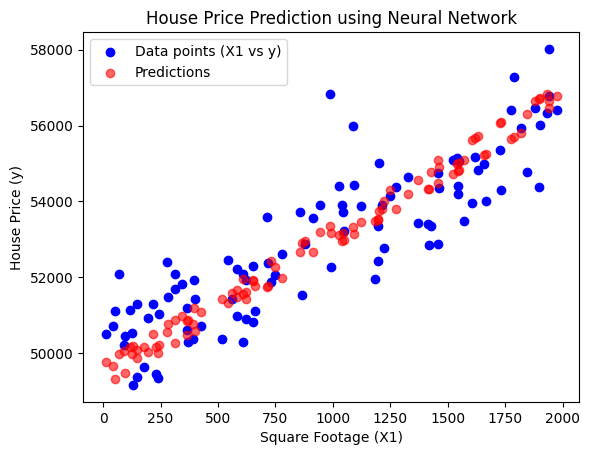

Intercept (c): [49166.44]
Coefficients (a, b): [[7216.3423  599.249 ]]


In [58]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Create a synthetic dataset for house price prediction
np.random.seed(42)

# Features (e.g., square footage and number of bedrooms)
X1 = np.random.rand(100, 1) * 2000  # Square footage (0-2000 sqft)
X2 = np.random.randint(1, 5, (100, 1))  # Number of bedrooms (1 to 4)

# Target (House price), linear relation with some noise
y = 3 * X1 + 3 * X2 + 50000 + np.random.randn(100, 1) * 1000  # y = a*x1 + b*x2 + c

# Combine the features into a single matrix
X = np.hstack((X1, X2))

# Normalize features to [0, 1] range
X_max = X.max(axis=0)
X_min = X.min(axis=0)
X_norm = (X - X_min) / (X_max - X_min)

# Convert to PyTorch tensors
X_tensor = torch.tensor(X_norm, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

# Step 2: Define the Neural Network model
class HousePriceNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2, 1)  # Two inputs (X1, X2) and one output (y)

    def forward(self, x):
        return self.linear(x)

# Initialize the model
model = HousePriceNN()

# Step 3: Define loss function and optimizer
criterion = nn.MSELoss()  # Mean Squared Error Loss
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)  # Stochastic Gradient Descent

# Step 4: Train the model
epochs = 2000
for epoch in range(epochs):
    # Forward pass
    y_pred = model(X_tensor)
    loss = criterion(y_pred, y_tensor)

    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

# Step 5: Visualizing the results
with torch.no_grad():
    y_pred_tensor = model(X_tensor)

# Plot the first feature (X1) against predicted and actual prices
plt.scatter(X1, y, color='blue', label='Data points (X1 vs y)')
plt.scatter(X1, y_pred_tensor.numpy(), color='red', label='Predictions', alpha=0.6)
plt.xlabel('Square Footage (X1)')
plt.ylabel('House Price (y)')
plt.legend()
plt.title('House Price Prediction using Neural Network')
plt.show()

# Step 6: Print model parameters
print(f"Intercept (c): {model.linear.bias.data.numpy()}")
print(f"Coefficients (a, b): {model.linear.weight.data.numpy()}")
